# Flutter Check

In this section a flutter check is going to be studied. The  simulation set-up in <em>Loads Kernel</em> was already shown in detail in a previous notebook. Hence, the focus will be more in the results and post processing. At the end, the <em>Loads Kernel</em> are compared with the <em>MSC Nastran</em> results.

## Simulation Set-up

It is assumed that the notebook concerning the simulation set-up was studied before. The only comments regarding the code script are focus on the differences with the other simulations. 

To analyze flutter, horizontal level flight (n<sub>Z</sub>=1) FL000 at trim conditions was selected. Again the mass configuration M3 was chosen. The same conditions were written two times because two different methods were used to analyse flutter. For every self.trimcase, a corresponding self.simcase is required. A time simulation is triggered if the simcase contains at least 'dt' and 't_final'. In the DC-3 case, for the flutter check the KE-method and the PK-method were used. In order to perform those two simulations, the 'flutter' field was set to True and the method chosen.

In [1]:
class jcl:

    def __init__(self):
        
        self.trimcase = [{'desc': 'CC.M3.OVCFL000.KE-Method', # Descriptive string of the maneuver case
                          # Kind of trim condition, blank for trim about all three axes, for more trim conditions see
                          # trim_conditions.py
                          'maneuver': '',
                          # Subcase ID number, for Nastran in acending order
                          'subcase': 1,
                          # Setting of the operational point
                          # The flight speed is given by the Mach number
                          'Ma': tas2Ma(70.0, 0.0),
                          # Aero key
                          'aero': 'VC',
                          # Atmo key
                          'altitude': 'FL000',
                          # Mass key
                          'mass': 'M3',
                          # Load factor Nz
                          'Nz': 1.0,
                          # Velocities and accelerations given in ISO 9300 coordinate system (right-handed, forward-right-down)
                          # Roll rate in rad/s
                          'p': 0.0 / 180.0 * np.pi,
                          # Pitch rate in rad/s
                          'q': 0.0 / 180.0 * np.pi,
                          # Yaw rate in rad/s
                          'r': 0.0,
                          # Roll acceleration in rad/s^2
                          'pdot': 0.0 ,
                          # Pitch acceleration in rad/s^2
                          'qdot': 0.0,
                          # Yaw acceleration in rad/s^2
                          'rdot': 0.0,
                          },
                         {'desc': 'CC.M3.OVCFL000.PK-Method', # Descriptive string of the maneuver case
                          # Kind of trim condition, blank for trim about all three axes, for more trim conditions see
                          # trim_conditions.py
                          'maneuver': '',
                          # Subcase ID number, for Nastran in acending order
                          'subcase': 2,
                          # Setting of the operational point
                          # The flight speed is given by the Mach number
                          'Ma': tas2Ma(70.0, 0.0),
                          # Aero key
                          'aero': 'VC',
                          # Atmo key
                          'altitude': 'FL000',
                          # Mass key
                          'mass': 'M3',
                          # Load factor Nz
                          'Nz': 1.0,
                          # Velocities and accelerations given in ISO 9300 coordinate system (right-handed, forward-right-down)
                          # Roll rate in rad/s
                          'p': 0.0 / 180.0 * np.pi,
                          # Pitch rate in rad/s
                          'q': 0.0 / 180.0 * np.pi,
                          # Yaw rate in rad/s
                          'r': 0.0,
                          # Roll acceleration in rad/s^2
                          'pdot': 0.0 ,
                          # Pitch acceleration in rad/s^2
                          'qdot': 0.0,
                          # Yaw acceleration in rad/s^2
                          'rdot': 0.0,
                          }]
     
        self.simcase = [{# True or False, enables 1-cosine gust according to CS-25
                         'gust': False,
                         # True or False, enables continuous turbulence excitation
                         'turbulence': False,
                         # True or False, calculates limit turbulence according to CS-25
                         'limit_turbulence': False,
                         # True or False, enables playback of control surface signals via efcs
                         'cs_signal': False,
                         # True or False, enables a generic controller e.g. to maintain p, q and r
                         'controller': False,
                         # True or False, enables a generic landing gear
                         'landinggear': False,
                         # True or False, enables calculation of rigid and elastic derivatives
                         'derivatives': False,
                         # True or False, enables flutter check with k, ke or pk method
                         'flutter': True,
                         # flutter parameters for k and ke method
                         'flutter_para': {'method': 'ke', 'k_red': np.linspace(3.0, 0.001, 100)},
                         },
                        {# True or False, enables 1-cosine gust according to CS-25
                         'gust': False,
                         # True or False, enables continuous turbulence excitation
                         'turbulence': False,
                         # True or False, calculates limit turbulence according to CS-25
                         'limit_turbulence': False,
                         # True or False, enables playback of control surface signals via efcs
                         'cs_signal': False,
                         # True or False, enables a generic controller e.g. to maintain p, q and r
                         'controller': False,
                         # True or False, enables a generic landing gear
                         'landinggear': False,
                         # True or False, enables calculation of rigid and elastic derivatives
                         'derivatives': False,
                         # True or False, enables flutter check with k, ke or pk method
                         'flutter': True,
                         # flutter parameters for pk method
                         'flutter_para': {'method': 'pk', 'Vtas': np.linspace(20.0, 300.0, 20)},
                         },
                        ]

In order to obtain the results the following 'launch.py' file is run. The results can be found in the folder 'DC-3_results'.

INFO: This is the log for process 0.
INFO: Starting Loads Kernel with job: jcl_dc3_flutter
INFO: User carn_fr on schwalbe (Linux-4.18.0-513.24.1.el8_9.x86_64-x86_64-with-glibc2.28)
INFO: pre:  True
INFO: main: True
INFO: post: True
INFO: test: False
INFO: --> Reading parameters from JCL.
INFO: --> Starting preprocessing.
INFO: Building structural model...
INFO: Read from file: /data/carn_fr/LoadsKernel/doc/tutorials/DC3_model/fem/structure_only.bdf
INFO: Found include(s):
INFO: Read from file: /data/carn_fr/LoadsKernel/doc/tutorials/DC3_model/fem/../fem/export_FUS.csv
INFO: Read from file: /data/carn_fr/LoadsKernel/doc/tutorials/DC3_model/fem/../fem/left-wing/left-wing.GRID_LREFAX_5400001
INFO: Read from file: /data/carn_fr/LoadsKernel/doc/tutorials/DC3_model/fem/../fem/left-wing/left-wing.RBE2_LREFAX_5400001
INFO: Read from file: /data/carn_fr/LoadsKernel/doc/tutorials/DC3_model/fem/../fem/left-wing/left-wing.CORD2R_LREFAX
INFO: Read from file: /data/carn_fr/LoadsKernel/doc/tutorials/

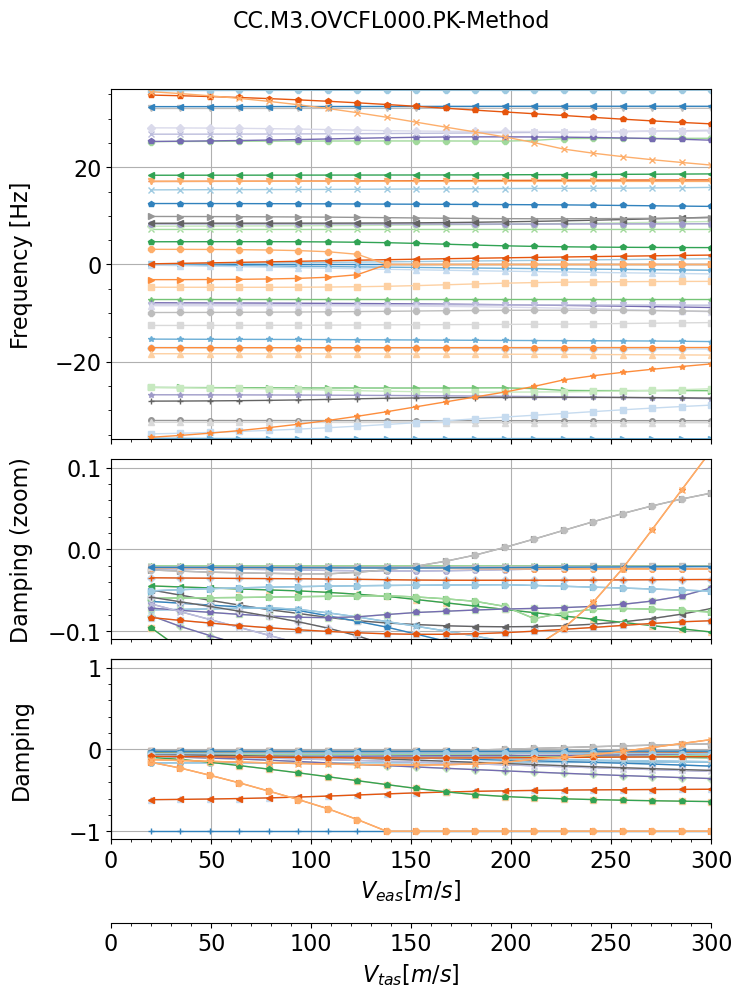

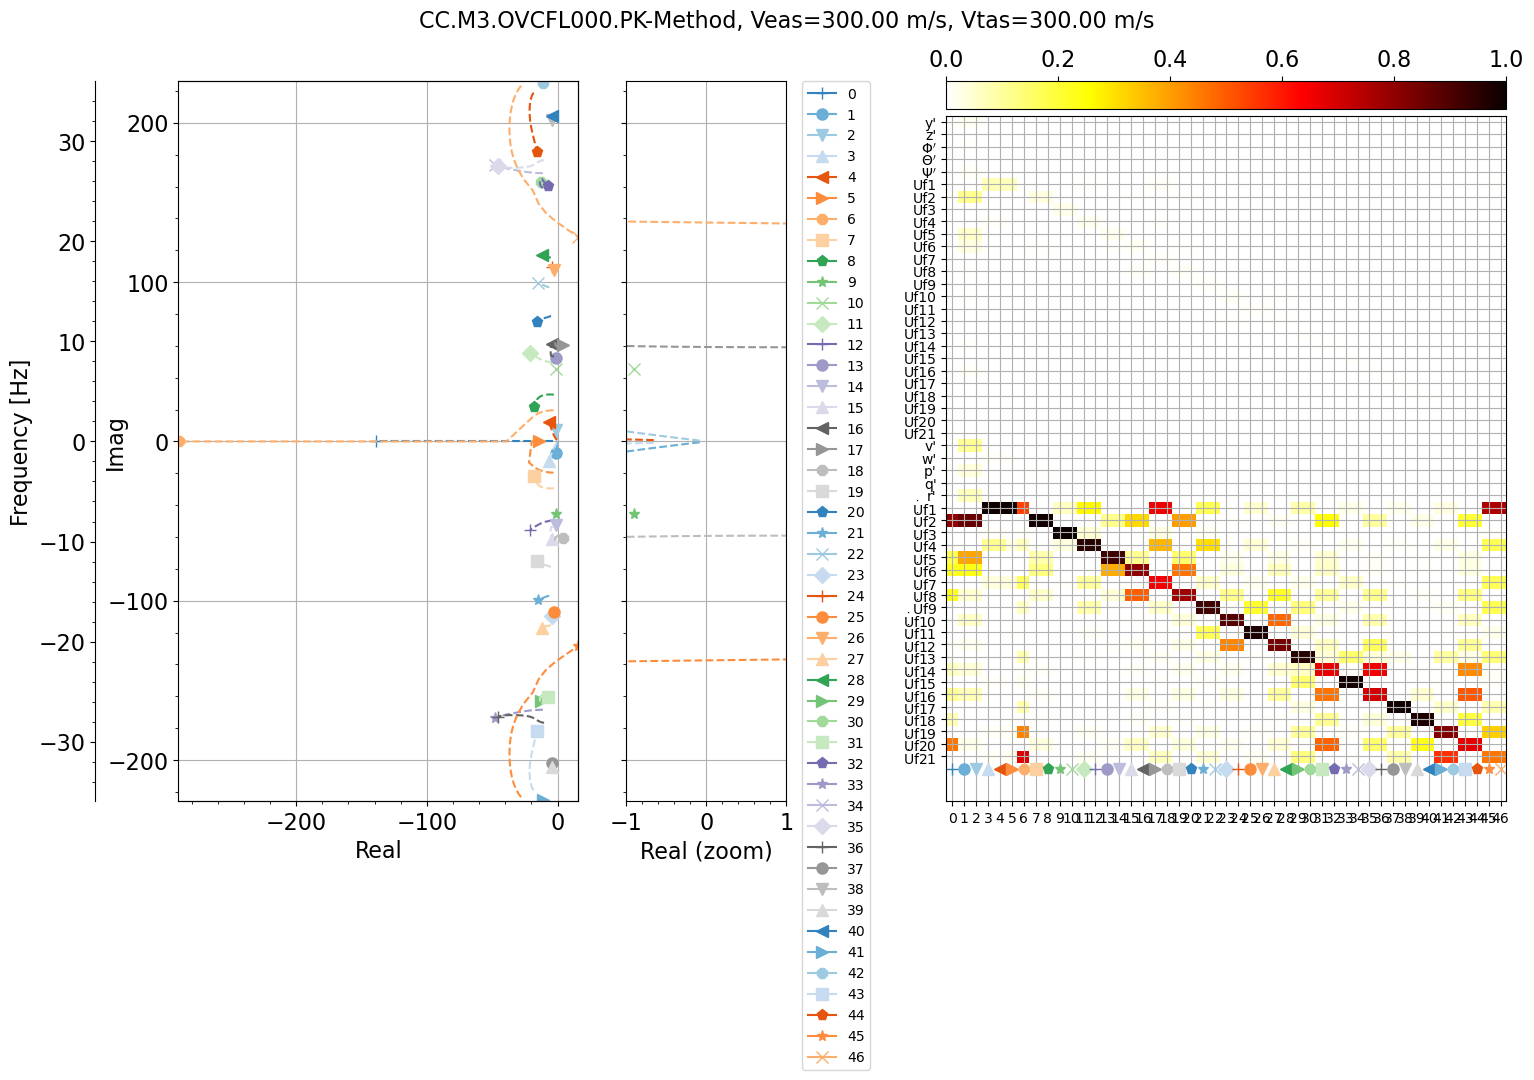

In [2]:
from loadskernel import program_flow

# Here you launch the Loads Kernel with your job
k = program_flow.Kernel('jcl_dc3_flutter', pre=True, main=True, post=True, test=False,
                        path_input='./DC3_model/JCLs',
                        path_output='./DC3_results')
k.run()

## Results

To conduct the flutter check, both the <em>Loads Kernel</em> or <em>MSC Nastran</em> was used. The flutter calculation was executed at FL000, where Equivalent Airspeed (EAS) is equal to True Airspeed (TAS), and the M3 mass configuration was adopted. The following figure illustrates the results of the flutter check conducted using <em>Loads Kernel</em> and the pk-method. The figure comprises two plots: one displaying the frequency of the modes as a function of velocity, and the other depicting the damping of the modes relative to velocity.

In the damping plot, the evolution of each eigenmode’s damping with velocity is portrayed. Initially, at low velocities, all eigenmodes exhibit negative damping, indicating stability. However, at a velocity of 195 m/s, the eigenmode with a frequency of 9.60 Hz becomes unstable, marking the flutter speed V<sub>flutter</sub>=195 m/s, equivalent to Ma=0.569. This mode represents the symmetrical pure torsion mode, maintaining a constant frequency across velocities. Subsequently, at 262 m/s, the mode with a frequency of 36.00 Hz also becomes unstable. This mode corresponds to a high-order symmetrical bending and torsion coupling mode,

<img src="./images/flutter_LK.png" width="450" alt="DC3">

*Flutter results Loads Kernel.*

Examining the <em>MSC Nastran</em> results, it is evident that at lower velocities, all eigenmodes exhibit negative damping, indicating stability. However, at a velocity of 203 m/s, the eigenmode with a frequency of 9.60 Hz becomes unstable, marking the flutter speed V<sub>flutter</sub>=203 m/s, equivalent to Ma=0.592. Comparing these findings with those from the <em>Loads Kernel</em> results, the first eigenmode to become unstable is the same, although at a slightly higher velocity in the case of <em>MSC Nastran</em>. Nevertheless, the results are remarkably consistent. 

At 256 m/s, another mode with a frequency of 26.19 Hz becomes unstable. Unlike the mode that became unstable around this velocity in the <em>Loads Kernel</em> analysis, this mode corresponds to a different high-order symmetrical bending and torsion coupling mode. In this instance, the frequency of the mode decreases from 26.19 Hz to 23 Hz by the time instability occurs. Thus, both <em>Loads Kernel</em> and <em>MSC Nastran</em> cases exhibit eigenmodes with a frequency of 23 Hz at the onset of instability, despite their differing initial frequencies.

<img src="./images/flutter_Nastran.png" width="380" alt="DC3">

*Flutter results MSC Nastran.*

It’s worth noting that both flutter speeds obtained lie outside the flight envelope (V<sub>NE</sub>=119.72 m/s), yet they remain within the subsonic regime (Ma<0.6), as intended.

For additional information about the meanuver load results please refer to {cite}`Carvalho2024`.